# Deep Learning Final Project: X-Ray Object Detection Literature Review

Soon-Hyuck Lee, Owen Randolph, Marcos Fernanadez, Pratham Dedhiya

##### Abstract

Airports face increasing pressure to improve the accuracy, speed, and consistency of security screening. Current baggage inspection systems rely heavily on human operators, who must analyze complex X-ray images under time constraints and high workload. This dependence introduces significant challenges, including operator fatigue, inconsistent performance, and a heightened risk of human error, particularly when identifying small, occluded, or visually ambiguous threat items.

To address these limitations, airports require a more advanced, scalable solution that can augment human screeners and enhance threat detection reliability. An AI-powered computer vision system based on deep learning provides a promising path forward. Such a system can automatically analyze X-ray images, highlight potential threats, reduce cognitive burden on security personnel, and serve as a foundation for next-generation screening platforms that increasingly automate the detection process.

##### Background

The use of deep learning in X-ray security screening has increased significantly in recent years due to major advances in convolutional neural networks (CNNs). Traditional image-processing methods struggle with X-ray images because objects often overlap, vary in shape, and appear with low contrast. Deep neural networks can learn hierarchical visual patterns such as edges, textures, materials, and object shapes. These characteristics make them well suited for analyzing complex baggage imagery that contains multiple overlapping items.

CNNs have become the standard method for image-based detection and classification because they learn features directly from raw pixel data. Early layers capture simple patterns like edges and corners. Deeper layers learn more abstract structures such as shapes, semantic components, or entire objects. This multi-level feature representation is essential for X-ray imaging because important visual cues may be subtle, partially occluded, or distorted by overlapping items.

Earlier CNN architectures such as VGG networks achieved strong performance but became difficult to train as they grew deeper. Simply stacking more layers often made training unstable and less effective. Very deep networks were affected by optimization problems such as vanishing gradients, where deeper layers failed to learn meaningful features. These limitations slowed progress in tasks that require high-level abstraction, including the detection of small concealed objects in X-ray images.

#### Related Work in Automated X-ray Object Detection

Recent work in automated X-ray analysis has focused on overcoming the basic challenges of limited availability of labeled data, high object overlap, and the variability of real baggage imagery. Kaminetzky and Mery (2024) present one of the most significant advances in data generation for X-ray security screening through their development of a simulation-based image augmentation framework. Their method uses 3D models of threat objects and superimposes simulated X-ray rendered images onto real baggage images, with additional realism introduced via diffusion-based distortion and seamntic segmentation techniques. By integrating these artifically-generated images with real data from the SIXray dataset, they trained hundreds of YOLOv5 models and demonstrated strong performance gains attributed solely to simulated data. Their results show that training exclusively on 16,000 simulated grayscale wrench images produced a real-image mAP of 72.7%, and augmenting only 50 real handgun images with 16,000 simulated examples increased detection accuracy from nearly 80 % to over 90 %. These findings indicate that simulation pipelines can meaningfully strengthen deep-learning-based object detectors while reducing the need for extensive manual labeling or additional X-ray acquisitions.

The SIXray benchmark itself (Miao et al.) remains one of the largest publicly available datasets for prohibited item detection and is widely used for evaluating modern X-ray recognition systems. Containing over one million X-ray images with heavily overlapping objects, SIXray introduces realistic challenges such as clutter, occlusion, and scale variation. Models evaluated on SIXray must be capable of distinguishing extremely small and partially hidden objects in complex baggage scenes, making it a critical resource for training and benchmarking deep neural networks in security applications.

Complementary to synthetic data generation and large-scale benchmarking, prior work has also looked into the task of overcoming data scarcity through transfer learning. Akcay et al. explore the use of pre-trained convolutional neural networks for X-ray object classification, noting that fully supervised end-to-end CNN training typically requires large, diverse datasets that are not readily available in the security domain. Their transfer learning framework adapts existing CNN models—originally trained on natural images—to the X-ray domain through secondary fine-tuning. Applied to handgun detection, their approach achieved a detection accuracy of 98.92%, outperforming earlier methods and demonstrating that domain-adapted transfer learning can effectively compensate for limited X-ray data.

Collectively, these works establish that progress in X-ray computer vision relies on three complementary strategies: (1) generating realistic simulated X-ray imagery to expand training sets, (2) leveraging large-scale benchmarks such as SIXray to develop models robust to occlusion and clutter, and (3) applying transfer learning to mitigate domain-specific data scarcity. These innovations form the foundation of current state-of-the-art research in automated baggage inspection and are directly relevant to the development of robust, real-time X-ray threat detection systems.

##### ResNet-50

ResNet is a foundation for many modern computer vision models, including YOLO.  It works like this:  ResNet learns the residual of identity mapping in a naural network, which reduces the burden of each layer.  We have an identity function that is added to the residual function.  Back propagation can take care of the residual coding part. So it is easier to train deep learning neural networks.

ResNet-50 contains fifty convolutional layers that are organized into residual blocks. These blocks allow the network to preserve important low-level information while learning higher-level semantic features. This characteristic makes ResNet-50 an effective backbone for X-ray object detection because the model can capture both simple features like edges and textures and more complex structures that indicate concealed threats.

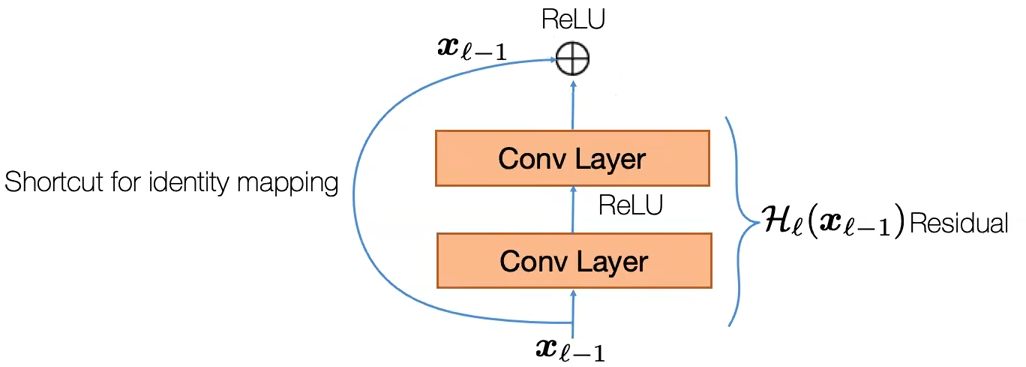

The residual block diagrams illustrate how ResNet achieves stable training. Each block contains two or three convolutional layers and a direct identity shortcut. Additional structures such as bottleneck blocks with 1x1 and 3x3 convolutions, combined with downsampling stages, create a deep feature hierarchy. This structure produces rich representations that are stable to train and effective for downstream tasks such as X-ray object detection, anomaly detection, and baggage threat recognition.

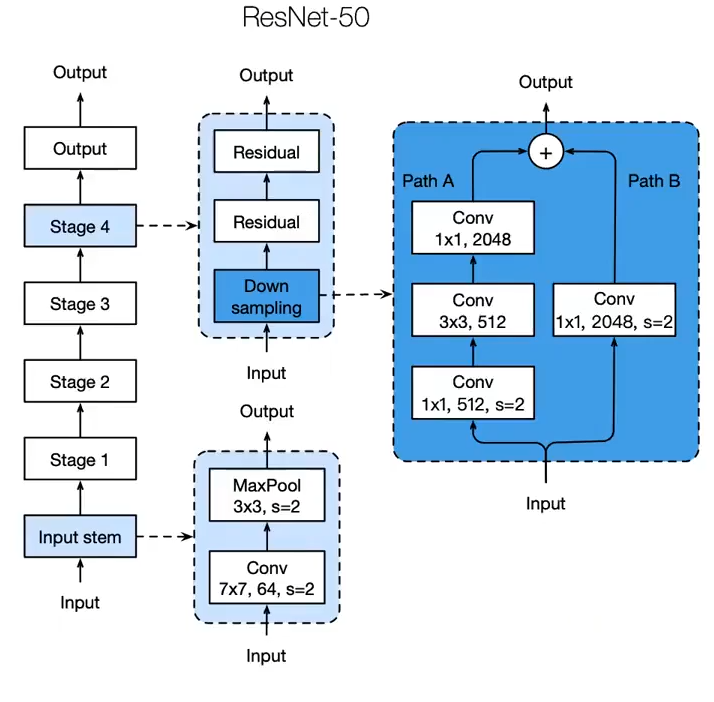

This structure highlights how ResNet-50 builds its deep feature hierarchy through repeated bottleneck residual blocks, each combining a main convolutional path with a shortcut connection, enabling the network to learn rich, multi-scale representations that are both stable to train and highly effective for downstream tasks such as X-ray object recognition.

##### YOLO for Object Detection
One of the most important advances in security imaging has been the shift from traditional two-stage detectors such as Faster R-CNN to faster single-stage object detection models such as YOLO (You Only Look Once). Two-stage detectors first generate region proposals and then classify those regions. YOLO eliminates this two-step process. It performs detection and classification in a single forward pass, which allows real-time inference with minimal loss of accuracy.

YOLO uses a dense grid prediction approach with multi-scale feature maps. This structure helps YOLO detect small, irregularly shaped, and partially occluded objects that commonly appear in X-ray images. YOLO's ability to localize multiple objects at different scales and classify them simultaneously makes it highly suitable for identifying concealed threats such as knives, batteries, and weapon components.

YOLO-based detectors consistently outperform two-stage models in throughput and latency. This makes them especially suitable for airport screening and other high-volume inspection environments where rapid decision-making is essential. Their performance on small and partially occluded objects is also valuable in X-ray settings, where prohibited items can appear faint or blend into complex backgrounds.

In many modern detection systems, including this project, YOLO is paired with a deep backbone network such as ResNet-50. ResNet serves as the feature extractor, and the YOLO detection head produces bounding box coordinates and class probabilities. This combination provides both strong feature extraction and fast detection, which is ideal for the challenges presented in X-ray baggage analysis.

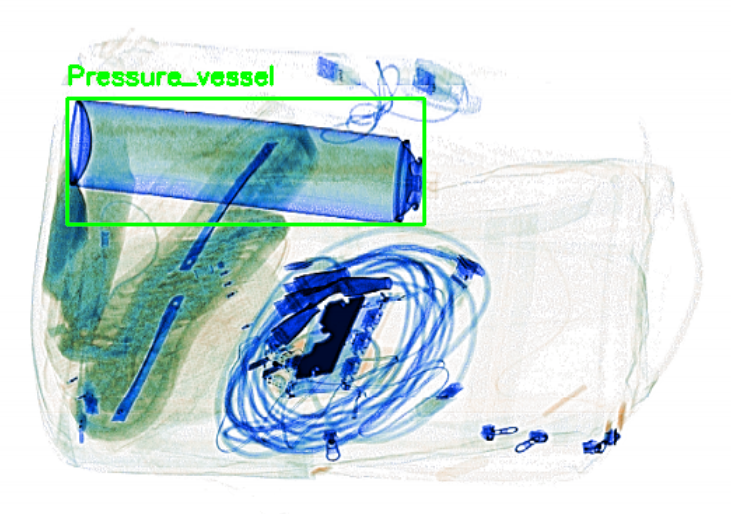

##### DvXray Dataset

The DvXray dataset is a large-scale dual-view X-ray baggage dataset created specifically for deep learning research in threat detection. Each sample contains two complementary X-ray images of the same bag, which helps reduce ambiguity caused by overlapping objects and improves the ability of models to identify small, faint, or partially occluded threats. The dataset includes thousands of positive and negative samples along with bounding box annotations for training object detection models. It is organized to support supervised learning and provides scripts for splitting the data, training baseline models, performing inference, and visualizing bounding boxes. Because modern airport scanners often provide more than one view of each bag, the dual-view design makes DvXray highly realistic and suitable for evaluating deep learning systems that need to generalize to real security screening environments.

##### Reference 

Akcay, S., Kundegorski, M. E., Devereux, M., & Breckon, T. P. (2016). Transfer learning using convolutional neural networks for object classification within X-ray baggage security imagery. In 2016 IEEE International Conference on Image Processing (ICIP) (pp. 1057–1061). https://doi.org/10.1109/ICIP.2016.7532536

He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) (pp. 770–778). https://doi.org/10.1109/CVPR.2016.90

He, T., Zhang, Z., Zhang, H., Sun, J., & Ma, Y. (2019). Bag of tricks for image classification with convolutional neural networks. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) (pp. 558–567). https://doi.org/10.1109/CVPR.2019.00065

Kaminetzky, A., & Mery, D. (2024). In-depth analysis of automated baggage inspection using simulated X-ray images of 3D models. Neural Computing and Applications, 36, 18761–18780. https://doi.org/10.1007/s00521-024-10335-4

Miao, C., Xie, L., Liu, F., Wang, L., & Tian, Q. (2019). SIXray: A large-scale security inspection X-ray benchmark for prohibited item discovery in overlapping images. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) (pp. 8469–8478). https://doi.org/10.1109/CVPR.2019.00867

Redmon, J., Divvala, S., Girshick, R., & Farhadi, A. (2016). You only look once: Unified, real-time object detection. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) (pp. 779–788). https://doi.org/10.1109/CVPR.2016.91
